Author: Rodrigo MM Santiago @rodrigommsantiago

In [1]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# function for coherence computations
from scipy.signal import coherence

# load Matlab files
from scipy.io import loadmat

# plot inline figures
%matplotlib inline 

import pylab as pl          # figure animations
from IPython import display # display tools
from time import sleep      # pause function

Phase lag for a given oscillation frequency in two signals

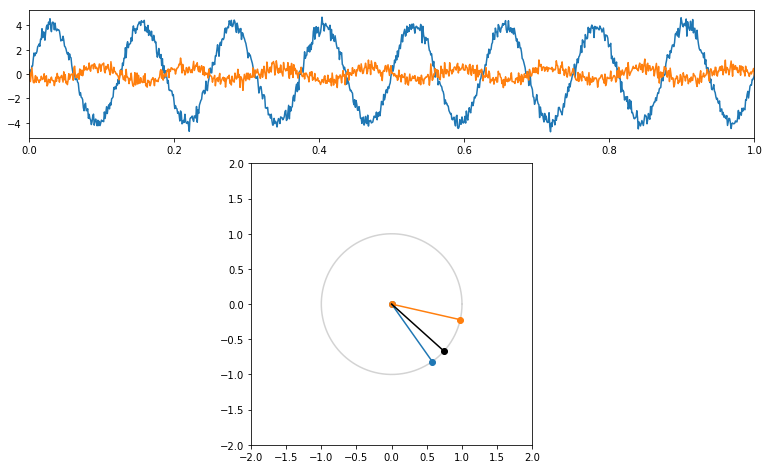

In [2]:
# Building a signal with noise
srate = 1000 # sampling rate
dt    = 1./srate # sampling interval
t     = np.arange(dt,4.000001,dt) # time vector
phi   = -np.deg2rad(180) # phase lag between signals

X = 4*np.sin(2*np.pi*8*t)+0.3*np.random.randn(len(t)) # signal X
Y = 0.5*np.sin(2*np.pi*8*t+phi)+0.3*np.random.randn(len(t)) # signal Y

plt.figure(figsize=(13,8))

ax1 = plt.subplot2grid((3,1),(0,0))
ax1.plot(t,X)
ax1.plot(t,Y)
ax1.set_xlim([0,1])

f   = 80. # Fourier kernel frequency
K   = np.exp(-1j*2*np.pi*f*t) # Fourier kernel
F_X = np.mean(X*K) # Fourier transform of X
F_Y = np.mean(Y*K) # Fourier transform of Y

# Unitary Fourier transforms
nF_X = F_X/abs(F_X)
nF_Y = F_Y/abs(F_Y)

# Unitary vector with angle differences
nF_XY = nF_X*np.conjugate(nF_Y)

ax2 = plt.subplot2grid((3,1),(1,0),rowspan=2)
ax2.axis('square')

# Polar plot
circle = np.exp(1j*np.linspace(0,2*np.pi,1000))
ax2.plot(circle.real,circle.imag,'lightgrey')

# Vector plot
ax2.plot([0,np.real(F_X)],[0,np.imag(F_X)])
ax2.plot([0,np.real(F_Y)],[0,np.imag(F_Y)])
ax2.plot(np.real(F_X),np.imag(F_X),'C0o')
ax2.plot(np.real(F_Y),np.imag(F_Y),'C1o')

# Unitary vector plot
ax2.plot([0,np.real(nF_X)],[0,np.imag(nF_X)],'C0')
ax2.plot([0,np.real(nF_Y)],[0,np.imag(nF_Y)],'C1')
ax2.plot(np.real(nF_X),np.imag(nF_X),'C0o')
ax2.plot(np.real(nF_Y),np.imag(nF_Y),'C1o')

# Angle difference vector plot
ax2.plot([0,np.real(nF_XY)],[0,np.imag(nF_XY)],'k')
ax2.plot(np.real(nF_XY),np.imag(nF_XY),'ko')

ax2.set_xlim([-2,2])
ax2.set_ylim([-2,2]);

Coherence estimates for a given oscillation frequency in two signals:

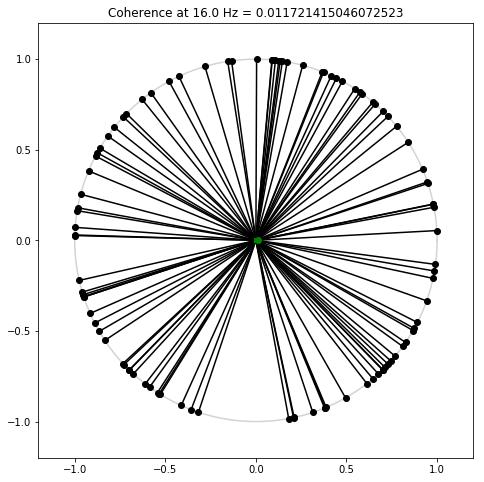

In [3]:
srate = 1000 # sampling rate
dt    = 1./srate # sampling interval
t     = np.arange(dt,4.000001,dt) # time vector
f     = 16. # Fourier kernel frequency

plt.figure(figsize=(8,8))
plt.axis('square')
# Polar plot
circle = np.exp(1j*np.linspace(0,2*np.pi,1000))
plt.plot(circle.real,circle.imag,'lightgrey')

nF_XYAll = np.empty(100)
for ntrial in range(100):
    phi   = -np.deg2rad(180)+0.1*np.random.randn()
    X = 4*np.sin(2*np.pi*8*t)+1.*np.random.randn(len(t))
    Y = 0.5*np.sin(2*np.pi*8*t+phi)+1.*np.random.randn(len(t))
    K = np.exp(-1j*2*np.pi*f*t) # Fourier kernel
    F_X = np.mean(X*K) # Fourier transform of X
    F_Y = np.mean(Y*K) # Fourier transform of Y
    # Unitary fourier transforms
    nF_X = F_X/abs(F_X)
    nF_Y = F_Y/abs(F_Y)
    # Unitary vector with angle differences
    nF_XY = nF_X*np.conjugate(nF_Y)
    nF_XYAll[ntrial] = nF_XY

    plt.plot([0,np.real(nF_XY)],[0,np.imag(nF_XY)],'k')
    plt.plot(np.real(nF_XY),np.imag(nF_XY),'ko')
    plt.title('#trial = '+str(ntrial))
    plt.xlim([-1.2,1.2])
    plt.ylim([-1.2,1.2])
    display.display(pl.gcf())
    display.clear_output(wait=True)

CXYVector = np.mean(nF_XYAll)
CXY = abs(CXYVector)
plt.plot([0,np.real(CXYVector)],[0,np.imag(CXYVector)],'g',linewidth=5)
plt.plot(np.real(CXYVector),np.imag(CXYVector),'go')
plt.title('Coherence at '+str(f)+' Hz = '+str(CXY));


Coherence spectrum:

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


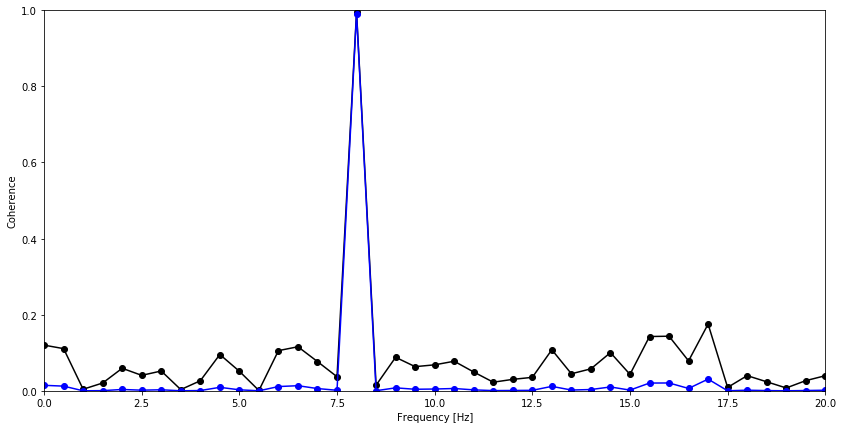

In [4]:
freqvector = np.arange(0,20.001,0.5);

CxySpectrum = np.empty(len(freqvector))
for count,f in enumerate(freqvector): # loop over the fourier transform frequencies
    nF_XYAll = np.empty(100)
    for ntrial in range(100):
        phi   = -np.deg2rad(180)+0.1*np.random.randn()
        X = 4*np.sin(2*np.pi*8*t)+1.*np.random.randn(len(t))
        Y = 0.5*np.sin(2*np.pi*8*t+phi)+1.*np.random.randn(len(t))
        K = np.exp(-1j*2*np.pi*f*t) # Fourier kernel
        F_X = np.mean(X*K) # Fourier transform of X
        F_Y = np.mean(Y*K) # Fourier transform of Y
        # Unitary Fourier transforms
        nF_X = F_X/abs(F_X)
        nF_Y = F_Y/abs(F_Y)
        # Unitary vector with angle differences
        nF_XY = nF_X*np.conjugate(nF_Y)
        nF_XYAll[ntrial] = nF_XY

    CXYVector = np.mean(nF_XYAll)
    CxySpectrum[count] = abs(CXYVector)

plt.figure(figsize=(14,7))
plt.plot(freqvector,CxySpectrum,'ko-')
plt.plot(freqvector,CxySpectrum**2,'bo-')
plt.ylim([0,1])
plt.xlim([0,20])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence');

Using *scipy.signal.coherence*:

Mean Coherence in Theta = 0.7480483604168342


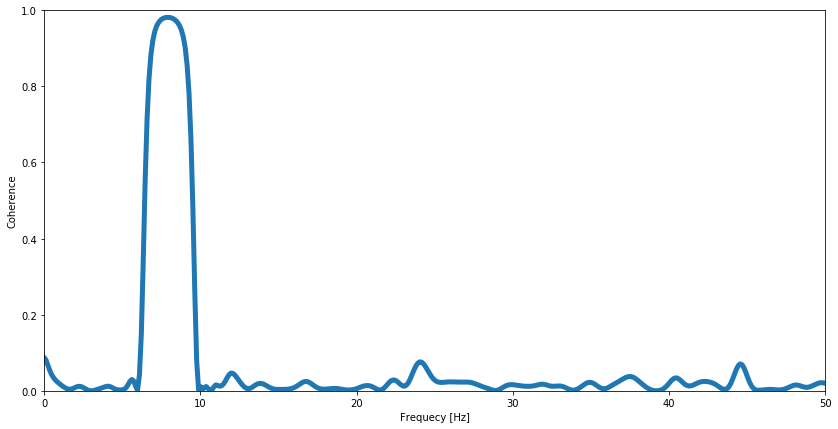

In [5]:
srate = 1000 # sampling rate
dt    = 1./srate # sampling interval
t     = np.arange(dt,40.000001,dt) # time vector
phi   = -np.pi+0.5*np.random.randn() # phase lag
X     = 4*np.sin(2*np.pi*8*t)+1.*np.random.randn(len(t))
Y     = 0.5*np.sin(2*np.pi*8*t+phi)+1.*np.random.randn(len(t))
 
windowlength = 1.*srate
overlap      = 0.5*windowlength
nfft         = 2**13

F, Cxy = coherence(X,Y,srate,nperseg=windowlength,noverlap=overlap,nfft=nfft)

plt.figure(figsize=(14,7))
plt.plot(F,Cxy,linewidth=5)
plt.xlim([0,50])
plt.ylim([0,1])
plt.xlabel('Frequecy [Hz]')
plt.ylabel('Coherence')

# Computing coherence in a given range of frequencies
Itheta = (F>6)*(F<10)
MeanThetaCoherence = np.mean(Cxy[Itheta])
print('Mean Coherence in Theta = '+str(MeanThetaCoherence))

Coherence between real signals

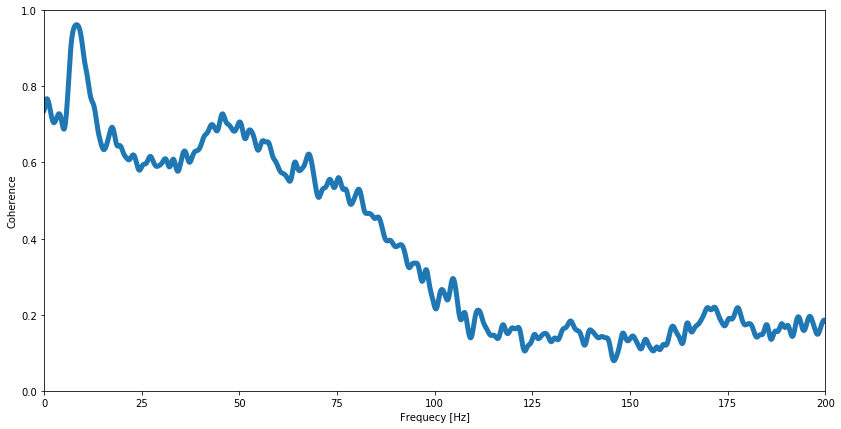

In [6]:
LFP     = loadmat('LFP_HG_HFO.mat')
LFP_HFO = LFP['lfpHFO'][0]
LFP_HG  = LFP['lfpHG'][0]
srate   = 1000

windowlength = 1*srate
overlap = 0.5*windowlength
nfft = 2**13

F, Cxy = coherence(LFP_HG,LFP_HFO,srate,nperseg=windowlength,
                   noverlap=overlap,nfft=nfft)

plt.figure(figsize=(14,7))
plt.plot(F,Cxy,linewidth=5)
plt.xlim([0,200])
plt.ylim([0,1])
plt.xlabel('Frequecy [Hz]')
plt.ylabel('Coherence');

Coherogram:

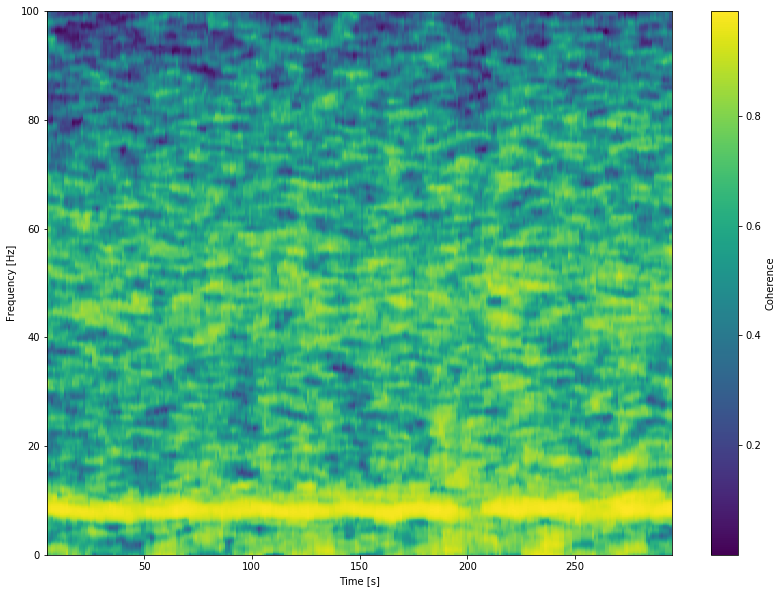

In [7]:
win    = 10*srate # window size
step   = 0.1*win # step size
Nwin   = int((len(LFP_HG)-win)/step+1)
nfft   = 2**13
cohwin = 1*srate # window within Cxy computation

Coherogram = []
T = []
for nwin in range(Nwin):
    temp = np.arange(win)+nwin*int(step)
    F, Cxy = coherence(LFP_HG[temp],LFP_HFO[temp],srate,nperseg=cohwin,nfft=nfft)
    Coherogram.append(Cxy.T)
    T.append(np.mean(temp*dt))

plt.figure(figsize=(14,10))
plt.pcolormesh(T,F,np.transpose(Coherogram))
plt.ylim([0,100])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Coherence');